In [180]:
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv('donnees-vaccination-par-pathologie.csv', sep = ';')

In [184]:
# Etude préliminaire du dataset :
# je vais maintenant vérifier que le dataset est complet

In [185]:
display(df.isna().sum())
df.isna().sum().sum()

date                                 0
regroupement_pathologie              0
pathologie                           0
region_residence                     0
libelle_region                      57
departement_residence                0
libelle_departement                  0
population_ref_cartographie          0
population_patho_cartographie      149
effectif_1_inj_pathologie          163
effectif_termine_pathologie        163
taux_1_inj_pathologie              163
taux_termine_pathologie            163
ordre                              826
effectif_rappel_pathologie         207
effectif_eligible_rappel_patho     163
effectif_rappel_parmi_eli_patho    207
taux_rappel_pathologie             207
taux_rappel_eligible_pathologie    207
dtype: int64

2675

In [186]:
# nous avons un set de données plutôt complet à première vue :
# pour chaque colonne il manque (si nous excluons l'ordre) au maximum 207 valeurs
# nous allons enlever la colonne ordre qui n'est pas bien définie et qui en plus contient de nombreuses lacunes

In [187]:
df = pd.read_csv('donnees-vaccination-par-pathologie.csv', sep = ';')

col = df.columns.to_list()
col.remove('ordre')
df = df[col]

nv_col = df.columns.to_list()
print( 'ordre' in nv_col)

False


In [188]:
# Nous avons réussi à retirer la colonne 'ordre'

Nous remarquons par ailleurs que sur plusieurs colonnes il manque 163 ou 207 valeurs, nous pouvons en déduire que souvent,
se sont les mêmes lignes qui sont incomplètes
essayons d'étudier le nombre de données manquantes par ligne

Text(0.5, 1.0, "Nombre de valeurs manquantes en fonction de l'indice")

<Figure size 800x1000 with 0 Axes>

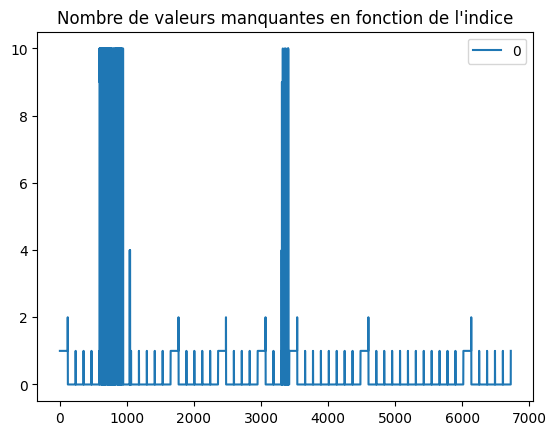

In [377]:
plt.figure(figsize=(8,10))
df.isna().sum(axis=1).to_frame().plot()
plt.title("Nombre de valeurs manquantes en fonction de l'indice")

In [191]:
# le graphique montre qu'il y a certes certaines lignes avec de nombreuses lacunes
# mais il est difficile de compter combien de lignes sont affectées par ces lacunes
# faisons-le avec pandas:

In [192]:
df1 = df.isna().sum(axis=1).to_frame(name='nb de valeurs manquantes')
df1[df1['nb de valeurs manquantes'] >= 1].value_counts(sort = True)

nb de valeurs manquantes
10                          149
1                            57
4                            44
9                            14
Name: count, dtype: int64

In [193]:
print("Nous avons bien seulement", df1[df1['nb de valeurs manquantes'] >= 1].value_counts().sum(), "lignes à trous")

Nous avons bien seulement 264 lignes à trous


In [194]:
# Les lacunes sont donc bien regroupées par lignes
# Cela va permettre de garder plus de lignes "saines" si nous souhaitons un jeu de données complet

In [195]:
# Nous faisons un .describe() afin d'avoir une vue d'ensemble sur le dataset
df.describe(include = 'all')

,date,regroupement_pathologie,pathologie,region_residence,libelle_region,departement_residence,libelle_departement,population_ref_cartographie,population_patho_cartographie,effectif_1_inj_pathologie,effectif_termine_pathologie,taux_1_inj_pathologie,taux_termine_pathologie,effectif_rappel_pathologie,effectif_eligible_rappel_patho,effectif_rappel_parmi_eli_patho,taux_rappel_pathologie,taux_rappel_eligible_pathologie
count,6726,6726,6726,6726,6669,6726,6726,6.726000e+03,6.577000e+03,6.563000e+03,6.563000e+03,6563.000000,6563.000000,6.519000e+03,6.563000e+03,6.519000e+03,6519.000000,6519.000000
unique,1,8,52,18,17,101,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-01-01,Pathologies psychiatriques et neurologiques,Toutes pathologies de la catégorie,76,Occitanie,Tout département,FRANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6726,1770,708,798,798,1026,1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.381890e+06,4.562986e+04,4.173586e+04,4.152714e+04,0.893130,0.887416,3.767564e+04,4.169751e+04,3.767108e+04,0.774680,0.862196
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.091817e+06,4.075124e+05,3.728386e+05,3.711108e+05,0.096599,0.099804,3.370975e+05,3.725117e+05,3.370597e+05,0.134071,0.090043
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040000e+04,1.000000e+01,1.000000e+01,1.000000e+01,0.349000,0.338000,1.000000e+01,1.000000e+01,1.000000e+01,0.160000,0.278000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.668300e+05,8.600000e+02,7.500000e+02,7.500000e+02,0.891000,0.885000,6.500000e+02,7.500000e+02,6.500000e+02,0.744000,0.838000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.491700e+05,3.290000e+03,2.970000e+03,2.950000e+03,0.919000,0.914000,2.660000e+03,2.970000e+03,2.660000e+03,0.813000,0.891000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.935800e+05,1.526000e+04,1.395500e+04,1.389500e+04,0.939000,0.935000,1.253500e+04,1.394500e+04,1.253500e+04,0.860000,0.921000


In [196]:
# Etude des pathologies:
# Nous allons désormais étudier les données relatives spécifiquement aux pathologies 
# Nous commençons par chercher les pathologies les plus présentes dans chaque région

In [202]:
for region in df['libelle_region'].unique()[:-1] :
    #print(type(region))
    dfr = df.groupby(by = 'libelle_region').get_group(region).value_counts('pathologie').to_frame()
    display(dfr.head(3))

,count
pathologie,
Toutes pathologies de la catégorie,78
Artériopathie oblitérante du membre inférieur,13
Maladies respiratoires chroniques (hors mucoviscidose),13


,count
pathologie,
Toutes pathologies de la catégorie,36
Artériopathie oblitérante du membre inférieur,6
Maladies respiratoires chroniques (hors mucoviscidose),6


,count
pathologie,
Toutes pathologies de la catégorie,42
Artériopathie oblitérante du membre inférieur,7
Maladies respiratoires chroniques (hors mucoviscidose),7


,count
pathologie,
Toutes pathologies de la catégorie,66
Artériopathie oblitérante du membre inférieur,11
Maladies respiratoires chroniques (hors mucoviscidose),11


,count
pathologie,
Toutes pathologies de la catégorie,84
Artériopathie oblitérante du membre inférieur,14
Maladies respiratoires chroniques (hors mucoviscidose),14


,count
pathologie,
Toutes pathologies de la catégorie,36
Artériopathie oblitérante du membre inférieur,6
Maladies respiratoires chroniques (hors mucoviscidose),6


,count
pathologie,
Toutes pathologies de la catégorie,78
Artériopathie oblitérante du membre inférieur,13
Maladies respiratoires chroniques (hors mucoviscidose),13


,count
pathologie,
Toutes pathologies de la catégorie,42
Artériopathie oblitérante du membre inférieur,7
Maladies respiratoires chroniques (hors mucoviscidose),7


,count
pathologie,
Toutes pathologies de la catégorie,54
Artériopathie oblitérante du membre inférieur,9
Maladies respiratoires chroniques (hors mucoviscidose),9


,count
pathologie,
Toutes pathologies de la catégorie,30
Artériopathie oblitérante du membre inférieur,5
Maladies respiratoires chroniques (hors mucoviscidose),5


,count
pathologie,
Toutes pathologies de la catégorie,18
Artériopathie oblitérante du membre inférieur,3
Maladies respiratoires chroniques (hors mucoviscidose),3


,count
pathologie,
Toutes pathologies de la catégorie,36
Artériopathie oblitérante du membre inférieur,6
Maladies respiratoires chroniques (hors mucoviscidose),6


,count
pathologie,
Toutes pathologies de la catégorie,54
Artériopathie oblitérante du membre inférieur,9
Maladies respiratoires chroniques (hors mucoviscidose),9


,count
pathologie,
Toutes pathologies de la catégorie,12
Artériopathie oblitérante du membre inférieur,2
Maladies respiratoires chroniques (hors mucoviscidose),2


,count
pathologie,
Toutes pathologies de la catégorie,12
Artériopathie oblitérante du membre inférieur,2
Maladies respiratoires chroniques (hors mucoviscidose),2


,count
pathologie,
Toutes pathologies de la catégorie,12
Artériopathie oblitérante du membre inférieur,2
Maladies respiratoires chroniques (hors mucoviscidose),2


,count
pathologie,
Toutes pathologies de la catégorie,12
Artériopathie oblitérante du membre inférieur,2
Maladies respiratoires chroniques (hors mucoviscidose),2


In [198]:
# Ici, la liste des libellés de région contient un Nan en dernière position, que nous rejetons grâce à un slicing
# En effet, cet objet est bien un array numpy :
print(type(df['libelle_region'].unique()))

<class 'numpy.ndarray'>


In [199]:
# Nous remarquons que la pathologie qui est le plus représentée est "Toutes pathologies de la catégorie"...
# Il est difficile de comprendre ce qui est derrière
# En revanche, les autres maladies sont réparties de manière uniforme : 
# pour chaque région nous avons le même nombre de cas pour toutes les pathologies
# nous pouvons le vérifier en changeant le paramètre du .head()
# Interprétation : il y a eu une volonté lors de la récolte de données de conserver un échantillon identique quelque soit le lieu 

In [200]:
# Nous allons maintenant étudier la manière dont les pathologies sont représentées à l'échelle de la France

,0
pathologie,
Accident vasculaire cérébral,118
Artériopathie oblitérante du membre inférieur,118
Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés,118
Autres cancers en phase active de traitements,118
Autres cancers sous surveillance,118
Cancer colorectal en phase active de traitement,118
Cancer colorectal sous surveillance,118
Cancer de la prostate en phase active de traitement,118
Cancer de la prostate sous surveillance,118


<Axes: xlabel='pathologie'>

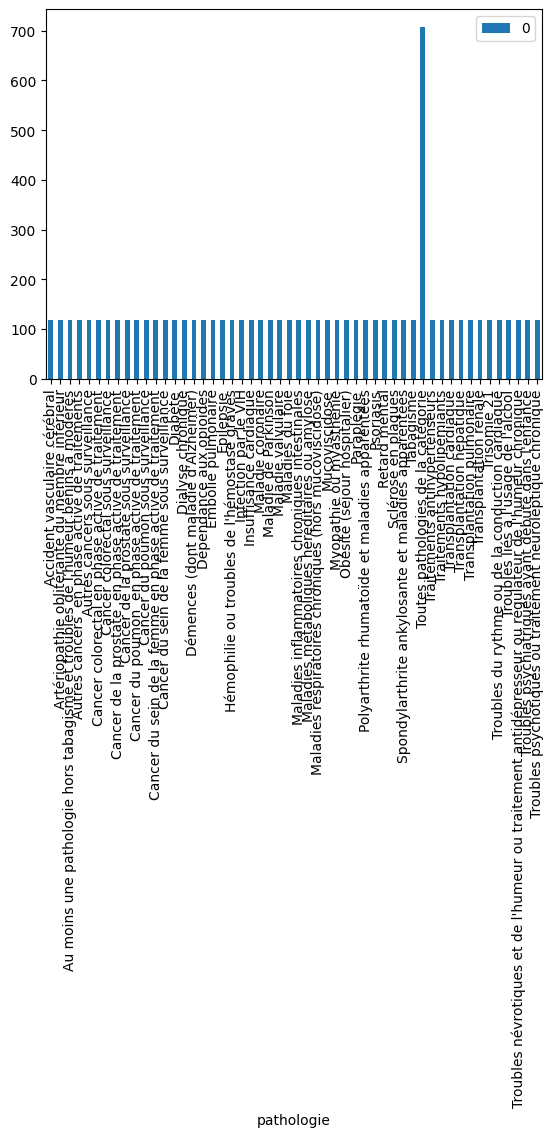

In [219]:
df2 = df.groupby(by='pathologie').size().to_frame()
display(df2)
df2.plot.bar()

In [212]:
# Encore ici, la répartition des maladies est uniforme
# Mais cette fois-ci il y a le même nombre de cas par pathologie, et bien sur toute la France
# Cependant, "Toutes pathologies de la catégorie" est plus représenté
# Interprétation : cette catégorie sert de fourre-tout en quelque sorte, ce qui explique le nombre d'occurences élevées

In [ ]:
# Cette répartition uniforme à l'échelle française est curieuse :  
# Même si la répartition des pathologies est uniforme par région, puisque les régions ont des poids différents (lié à leur densité)
# Nous devrions avoir une répartition moins lisse
# Etudions alors la manière dont sont réparties les régions sur ce dataset

,0
libelle_region,
Auvergne-Rhône-Alpes,741
Bourgogne-Franche-Comté,513
Bretagne,285
Centre-Val de Loire,399
Corse,171
Grand Est,627
Guadeloupe,114
Guyane,114
Hauts-de-France,342


<Axes: xlabel='libelle_region'>

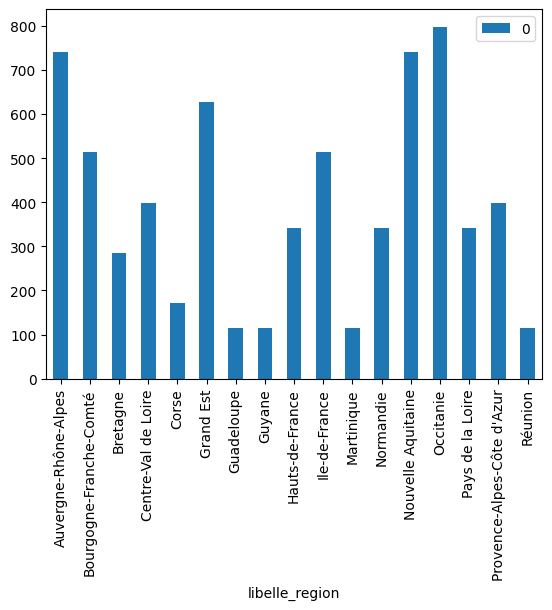

In [222]:
df3 = df.groupby(by = 'libelle_region').size().to_frame()
display(df3)
df3.plot.bar()

In [ ]:
# La répartition est bien inégale en fonction des régions
# Vérifions qu'elle est conforme à la répartition en fonction de la densité

In [ ]:
# En fait, ce n'est pas possible => nous avons les données du nombre d'habitant uniquement par département
# Nous allons donc conduire la même étude, par département cette fois-ci :
# Nous commençons par reprendre le graphe précédent par département

libelle_departement
FRANCE    1026
dtype: int64

<Axes: xlabel='libelle_departement'>

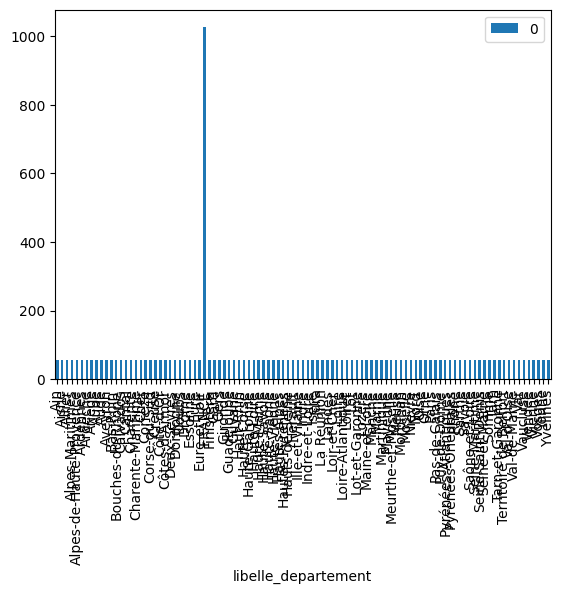

In [266]:
df4 = df.groupby(by = 'libelle_departement').size()
display(df4.head(df4.argmax()+1).tail(1))
df4.to_frame().plot.bar()

In [257]:
# Pour chaque département, la répartition est bien uniforme
# Sauf pour un, celui référencé 'FRANCE', qui est encore ici un sorte de débarras pour certaines données, nous allons le retirer pour la suite

,libelle_departement,population_ref_cartographie
0,Ain,505020
1,Aisne,411650
2,Allier,274670
3,Alpes-de-Haute-Provence,138860
4,Hautes-Alpes,120110
...,...,...
95,Val-d'Oise,984330
96,Guadeloupe,316090
97,Martinique,299680
98,Guyane,134050


<Axes: >

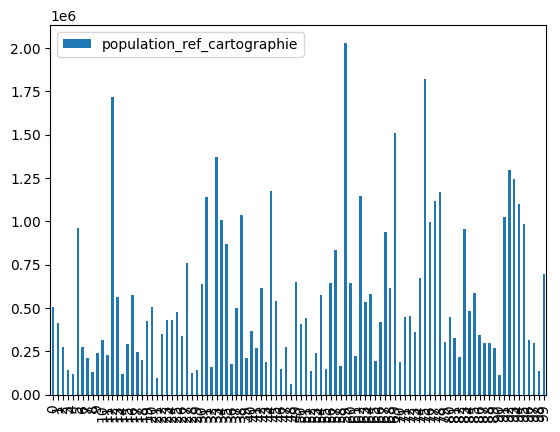

In [283]:
dep = df['libelle_departement'].unique()[:-1]
df5 = df[['libelle_departement','population_ref_cartographie']]
df5 = df5.filter(items=[i for i in range(len(dep))],axis=0)
display(df5)
df5.plot.bar()

In [ ]:
# Les deux derniers graphiques ne sont pas semblables:
# Cela nous prouve bien que la représentation des malades par départemenst n'est pas conforme à la proportion d'habitants du département à l'échelle française

In [ ]:
# Etudions enfin le ratio de la population malade sur celui de la population saine

In [311]:
df6 = df.filter(items=[i for i in range(len(dep))],axis=0)
df6['ratio'] = df6['population_patho_cartographie']/df6['population_ref_cartographie']
df6 = df6[['libelle_departement','ratio']]
display(df6)
ecart_type = df6.describe().loc['std','ratio']
moy = df6['ratio'].mean()
print(moy)

,libelle_departement,ratio
0,Ain,0.336660
1,Aisne,0.438309
2,Allier,0.449521
3,Alpes-de-Haute-Provence,0.393922
4,Hautes-Alpes,0.368412
...,...,...
95,Val-d'Oise,0.328945
96,Guadeloupe,0.406941
97,Martinique,0.390116
98,Guyane,0.281388


0.3893994742073859


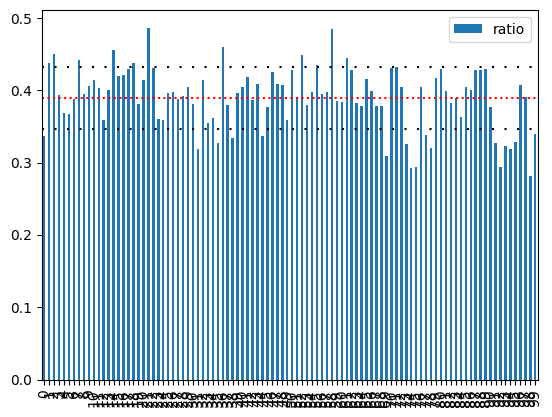

In [325]:
df6.plot.bar()
plt.axhline(y=moy, c='red', linestyle=':')
plt.axhline(y=moy+ecart_type, c='black', linestyle=(0,(1,5)))
plt.axhline(y=moy-ecart_type, c='black', linestyle=(0,(1,5)))

In [331]:
# La moyenne est de presque 0,4 
# Environ 4 personnes sur 10 sont donc atteintes par au moins une pathologie
# Etudions le cas du cancer : 

0.012403722123866385


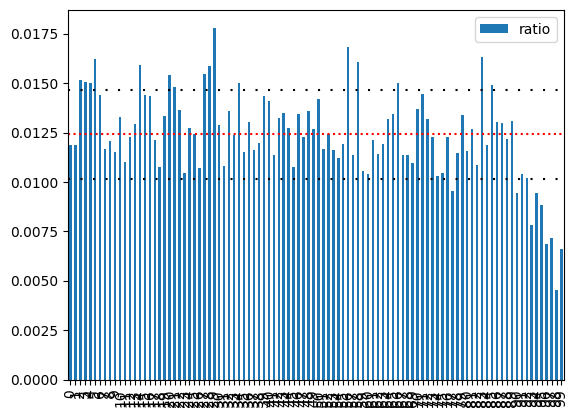

In [374]:
col = ['libelle_departement','population_patho_cartographie','population_ref_cartographie']
df7 = df[df['regroupement_pathologie'] == 'Cancers actifs'][col].head(len(dep)).reset_index()
col1 = df7['population_patho_cartographie'].to_frame().reset_index()
col2 = df[df['regroupement_pathologie'] == 'Cancers sous surveillance']['population_patho_cartographie'].head(len(dep)).to_frame().reset_index()
somme = col1 + col2
df7['pop_cancer'] = somme['population_patho_cartographie']
df7['ratio'] = df7['population_patho_cartographie']/df7['population_ref_cartographie']
ecart_type_cancer = df7[['libelle_departement','ratio']].describe().loc['std','ratio']
moy_cancer = df7['ratio'].mean()
print(moy_cancer)
df7[['libelle_departement','ratio']].plot.bar()
plt.axhline(y=moy_cancer, c='red', linestyle=':')
plt.axhline(y=moy_cancer+ecart_type_cancer, c='black', linestyle=(0,(1,5)))
plt.axhline(y=moy_cancer-ecart_type_cancer, c='black', linestyle=(0,(1,5)))

In [375]:
# D'après le dataset, environ 1% de la population serait touché par un cancer